In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
userPoolInfo = pd.read_csv('userPoolInfo_2', sep=',', encoding='latin 1')

In [3]:
userPoolInfo.shape

(211364, 5)

In [4]:
print(len(np.unique(userPoolInfo.username)))
print(len(np.unique(userPoolInfo['game id'])))

2031
15300


In [5]:
userPoolInfo.head()

,Unnamed: 0,game,game id,rating,username
0,0,7 Wonders,68448,7.5,Quantiarc
1,1,7 Wonders Duel,173346,9.0,Quantiarc
2,2,Acquire,5,8.5,Quantiarc
3,3,Age of War,155695,7.5,Quantiarc
4,4,Agricola,31260,8.0,Quantiarc


## Summary statistics of ratings

6.82815946854713
1.6351690315917862
211364


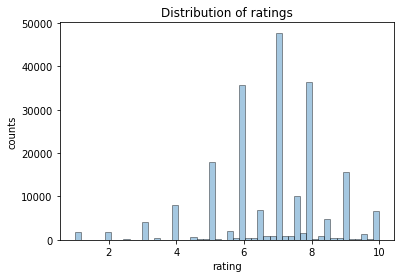

In [6]:
y = userPoolInfo['rating']
sns.distplot(y, kde=False, hist_kws=dict(edgecolor="k", linewidth=1))
plt.xlabel('rating')
plt.ylabel('counts')
plt.title('Distribution of ratings')
print(np.mean(y))
print(np.std(y))
print(len(y))

5.991242274584013
1.4417149614062295
15300


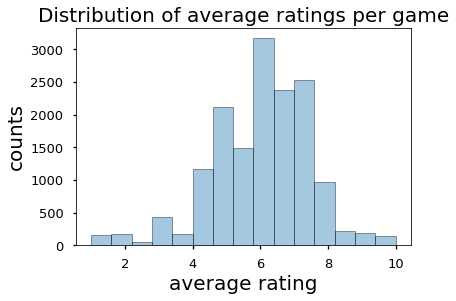

In [7]:
y = userPoolInfo.groupby('game id')['rating'].mean()
sns.distplot(y, kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=1))
sns.set_context("talk")
plt.xlabel('average rating', fontsize=20)
plt.ylabel('counts', fontsize=20)
plt.title('Distribution of average ratings per game', fontsize=20)
print(np.mean(y))
print(np.std(y))
print(len(y))
plt.savefig('avgratingdist.png', bbox_inches='tight')

7.248387058015942
0.7453204612589504
2031


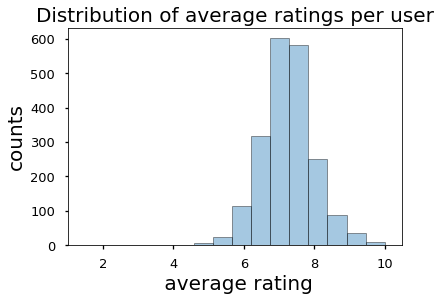

In [10]:
y = userPoolInfo.groupby('username')['rating'].mean()
sns.distplot(y, kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=1))
sns.set_context("talk")
plt.xlabel(' average rating', fontsize=20)
plt.ylabel('counts', fontsize=20)
plt.title('Distribution of average ratings per user', fontsize=20)
plt.xlim(1, 10.5)
print(np.mean(y))
print(np.std(y))
print(len(y))
plt.savefig('avguserratingdist.png', bbox_inches='tight')

In [9]:
userPoolInfo.username.value_counts()

evingerm@epix.net      2518
fiorevita              1772
Pozman                 1651
LucyJo                 1363
MarkEJohnson           1305
roberious              1283
sweetsweetdoughnuts    1275
Windmilling            1256
william4192            1248
faqtotum               1231
elschmear              1204
pulla                  1195
Celtic                 1147
LookAtTheBacon         1064
rabid_schnauzer         986
Damlog                  961
voynitsky               955
pusboyau                857
Joshuaaaaaa             843
Ninebreaker2            779
unshod                  763
petegrey                735
WonderCinz              732
Lothartvni              727
liga                    726
pijll                   725
Hollender               721
Galahad                 711
aldaryn                 697
StatSig                 680
                       ... 
newtonc                   3
GTthunder580              3
rdourado                  3
thefritobandito           3
dr-evil             

8.226068376068376
0.873989403142964
39


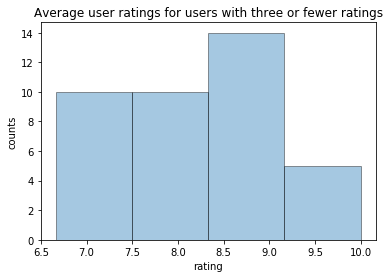

In [10]:
userPoolInfo_groupusers = userPoolInfo.groupby('username')['rating'].count()
userPoolInfo_groupusers_small = userPoolInfo_groupusers[userPoolInfo_groupusers.sort_values() <= 3]
y = userPoolInfo[userPoolInfo.username.isin(userPoolInfo_groupusers_small.index)].groupby('username')['rating'].mean()
sns.distplot(y, kde=False, hist_kws=dict(edgecolor="k", linewidth=1))
plt.xlabel('rating')
plt.ylabel('counts')
plt.title('Average user ratings for users with three or fewer ratings')
print(np.mean(y))
print(np.std(y))
print(len(y))

6.401739407044832
0.5301279704075035
14


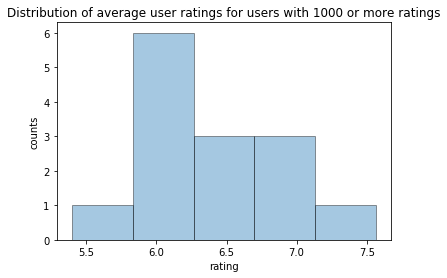

In [11]:
userPoolInfo_groupusers = userPoolInfo.groupby('username')['rating'].count()
userPoolInfo_groupusers_big = userPoolInfo_groupusers[userPoolInfo_groupusers.sort_values() >= 1000]
y = userPoolInfo[userPoolInfo.username.isin(userPoolInfo_groupusers_big.index)].groupby('username')['rating'].mean()
sns.distplot(y, kde=False, hist_kws=dict(edgecolor="k", linewidth=1))
plt.xlabel('rating')
plt.ylabel('counts')
plt.title('Distribution of average user ratings for users with 1000 or more ratings')
print(np.mean(y))
print(np.std(y))
print(len(y))

In [42]:
userPoolInfo['game id'].value_counts()

13        2062
822       1318
30549     1173
36218     1086
9209       986
3076       978
68448      972
31260      932
2651       861
40692      835
478        763
129622     727
14996      724
70323      701
39856      675
28143      666
178900     642
148228     632
34635      599
11         597
1927       576
110327     567
65244      539
50         535
41114      531
84876      517
98778      516
15987      504
12333      500
40834      491
          ... 
10282        1
9770         1
26146        1
122389       1
31905        1
164279       1
199247       1
158122       1
141730       1
59770        1
22892        1
146409       1
177927       1
7213         1
10594        1
134255       1
17574        1
194032       1
86349        1
11988        1
93443        1
5420         1
3375         1
38204        1
198328       1
32161        1
9642         1
1752         1
218564       1
185996       1
Name: game id, Length: 15300, dtype: int64

7.507815539698362
0.13846858586423766
4


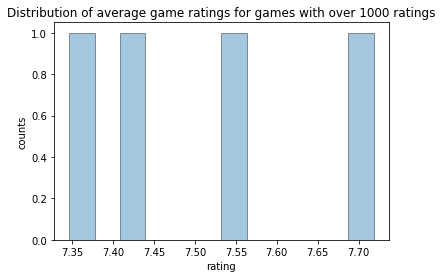

In [13]:
userPoolInfo_groupgames = userPoolInfo.groupby('game id')['rating'].count()
userPoolInfo_groupgames_big = userPoolInfo_groupgames[userPoolInfo_groupgames.sort_values() >= 1000]
y = userPoolInfo[userPoolInfo['game id'].isin(userPoolInfo_groupgames_big.index)].groupby('game id')['rating'].mean()
sns.distplot(y, bins=12, kde=False, hist_kws=dict(edgecolor="k", linewidth=1))
plt.xlabel('rating')
plt.ylabel('counts')
plt.title('Distribution of average game ratings for games with over 1000 ratings')
print(np.mean(y))
print(np.std(y))
print(len(y))

5.655481783269328
1.7908783415687206
5989


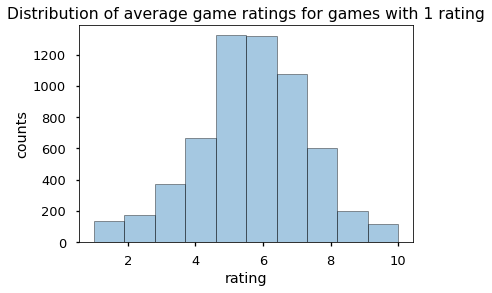

In [43]:
userPoolInfo_groupgames = userPoolInfo.groupby('game id')['rating'].count()
userPoolInfo_groupgames_small = userPoolInfo_groupgames[userPoolInfo_groupgames.sort_values() <= 1]
y = userPoolInfo[userPoolInfo['game id'].isin(userPoolInfo_groupgames_small.index)].groupby('game id')['rating'].mean()
sns.distplot(y, kde=False, bins=10, hist_kws=dict(edgecolor="k", linewidth=1))
plt.xlabel('rating')
plt.ylabel('counts')
plt.title('Distribution of average game ratings for games with 1 rating')
print(np.mean(y))
print(np.std(y))
print(len(y))

In [15]:
userPoolInfo[userPoolInfo['game id'].isin(userPoolInfo_groupgames_small.index)]

,Unnamed: 0,game,game id,rating,username
149,149,More Curses!,177131,5.0,SuzyPlantation
277,277,Natives,235902,6.0,Miss_Meeple
282,282,Origami,234469,6.5,Miss_Meeple
331,331,Il Trono di Mortadella,208888,6.0,Miss_Meeple
555,555,Boon,180894,8.0,wizardoest
711,711,Bedlam,5149,5.0,Raving_Engineer
718,718,Monopoly: Ipswich Edition,28368,5.5,Raving_Engineer
723,723,Top Gear,69909,4.0,Raving_Engineer
763,763,Eye of Horus,3398,5.0,stwerner92182
775,775,Hunting and Fishing Trivia,9926,4.0,stwerner92182


## Interesting point here is that a lot of the 1-rating games are small card/dice games that have quick play time

In [16]:
userPoolInfo[userPoolInfo['game id']==30549].groupby('game id')['rating'].mean()

game id
30549    7.533406
Name: rating, dtype: float64

In [17]:
userPoolInfo.drop('Unnamed: 0', axis=1, inplace=True)
userPoolInfo.head()

,game,game id,rating,username
0,7 Wonders,68448,7.5,Quantiarc
1,7 Wonders Duel,173346,9.0,Quantiarc
2,Acquire,5,8.5,Quantiarc
3,Age of War,155695,7.5,Quantiarc
4,Agricola,31260,8.0,Quantiarc


Text(0.5,1,'Number of ratings per game')

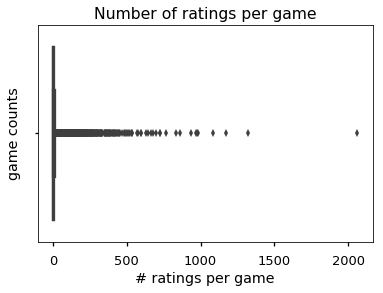

In [44]:
y=userPoolInfo['game id'].value_counts().tolist()
sns.boxplot(y)
#sns.violinplot(y)
plt.xlabel('# ratings per game')
#plt.xlim(0,10)
#plt.ylim(0, 1000)
plt.ylabel('game counts')
plt.title('Number of ratings per game')

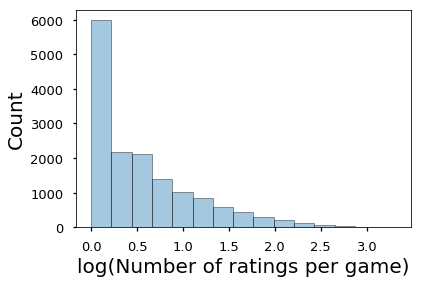

In [7]:
y=np.log10(userPoolInfo['game id'].value_counts()).tolist()
g = sns.distplot(y, kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=1))
plt.xlabel('log(Number of ratings per game)', fontsize=20)
sns.set_context("talk")
#g.set_xscale('log')
#plt.xlim(1,10)
#plt.ylim(0, 1000)
plt.ylabel('Count', fontsize=20)
#plt.title('Distribution of ratings per game', fontsize=20)
plt.savefig('ratingdist.png', bbox_inches='tight')

Text(0.5,1,'Number of ratings per user')

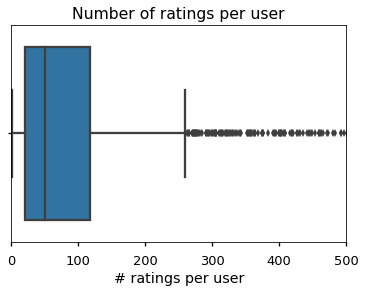

In [20]:
y=userPoolInfo.username.value_counts().tolist()
sns.boxplot(y)
#sns.violinplot(y)
plt.xlabel('# ratings per user')
plt.xlim(0,500)
#plt.ylim(0, 1000)
#plt.ylabel('user counts')
plt.title('Number of ratings per user')

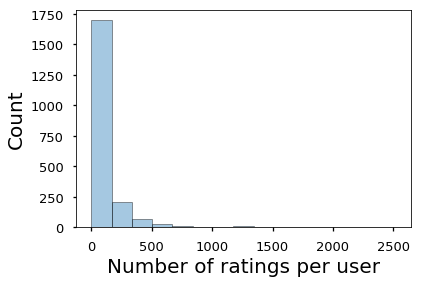

In [12]:
y=userPoolInfo.username.value_counts().tolist()
sns.distplot(y, kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=1))
sns.set_context("talk")
plt.xlabel('Number of ratings per user', fontsize=20)
#plt.xlim(100,500)
#plt.ylim(0, 225)
plt.ylabel('Count', fontsize=20)
#plt.title('Distribution of ratings per user', fontsize=20)
plt.savefig('ratinguserdist.png', bbox_inches='tight')